In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [25]:
# Generate synthetic data (1,000 rows with some missing values)
np.random.seed(42)
data = {
    'income': np.random.uniform(5000, 150000, 1000),  # Monthly income in NGN
    'transaction_freq': np.random.poisson(15, 1000),  # Weekly transactions
    'age': np.random.randint(18, 60, 1000),  # Age in years
    'occupation': np.random.choice(['trader', 'okada_rider', 'artisan', 'other'], 1000),
    'default': np.random.choice([0, 1], 1000, p=[0.7, 0.3])  # 70% repay, 30% default
}
df = pd.DataFrame(data)

In [26]:
# Introduce some missing values for realism
df.loc[np.random.choice(df.index, 50), 'income'] = np.nan
df.loc[np.random.choice(df.index, 30), 'transaction_freq'] = np.nan

In [27]:
# Preprocessing
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['income', 'transaction_freq']] = imputer.fit_transform(df[['income', 'transaction_freq']])

In [28]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['occupation'], drop_first=True)

In [29]:
# Scale features
scaler = StandardScaler()
features_to_scale = ['income', 'transaction_freq', 'age']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [30]:
# Add interaction term for better prediction
df['income_freq_interaction'] = df['income'] * df['transaction_freq']

In [31]:
# Features and target
X = df.drop('default', axis=1)
y = df['default']

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Train model with cross-validation
model = LogisticRegression(max_iter=1000, C=0.1)  # Adjusted regularization
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [34]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")
print(f"Test Accuracy: {accuracy:.2f}")

Cross-Validation Accuracy: 0.72 (+/- 0.01)
Test Accuracy: 0.70


In [35]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})
feature_importance = feature_importance.sort_values(by='coefficient', ascending=False)

In [36]:
# Enhanced visualization: Feature importance with default risk trend
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

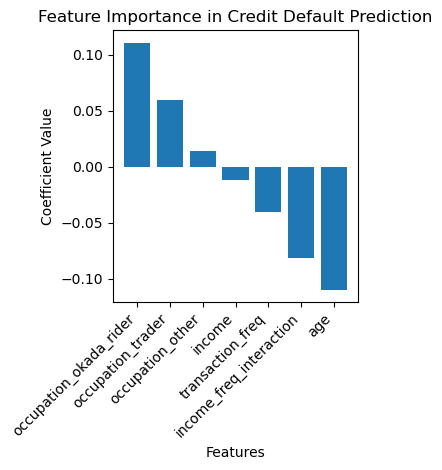

In [37]:
# Bar plot for feature importance
plt.subplot(1, 2, 1)
bars = plt.bar(feature_importance['feature'], feature_importance['coefficient'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Credit Default Prediction')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()

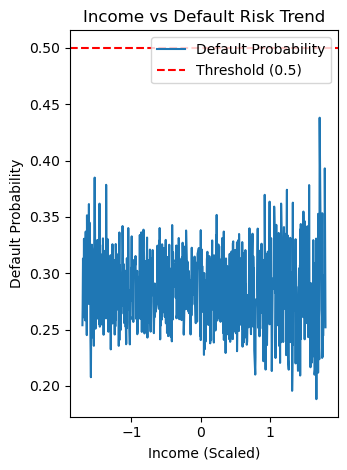

In [38]:
# Plot default risk trend (income vs default probability)
plt.subplot(1, 2, 2)
df['default_prob'] = model.predict_proba(X)[:, 1]  # Probability of default
df_sorted = df.sort_values('income')
plt.plot(df_sorted['income'], df_sorted['default_prob'], label='Default Probability')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold (0.5)')
plt.xlabel('Income (Scaled)')
plt.ylabel('Default Probability')
plt.title('Income vs Default Risk Trend')
plt.legend()

plt.tight_layout()
plt.show()  # Ensure plot displays without text output